In [95]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [96]:
df = pd.read_csv("madfhantr.csv")

In [97]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [98]:
df = df.dropna()

In [99]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [100]:
#Encoder
X = pd.get_dummies(X)


In [101]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)



In [102]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
model = DecisionTreeClassifier(random_state=42)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

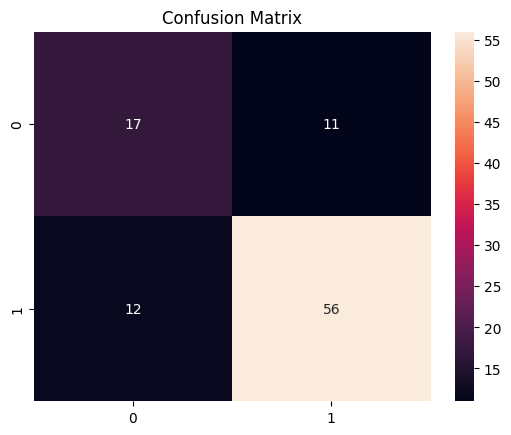

Accuracy : 0.7604166666666666


In [103]:
from sklearn.metrics import accuracy_score , confusion_matrix
acc= accuracy_score(y_test,y_pred)
cm= confusion_matrix(y_test,y_pred)

# displaying Evaluation
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy : {acc}")

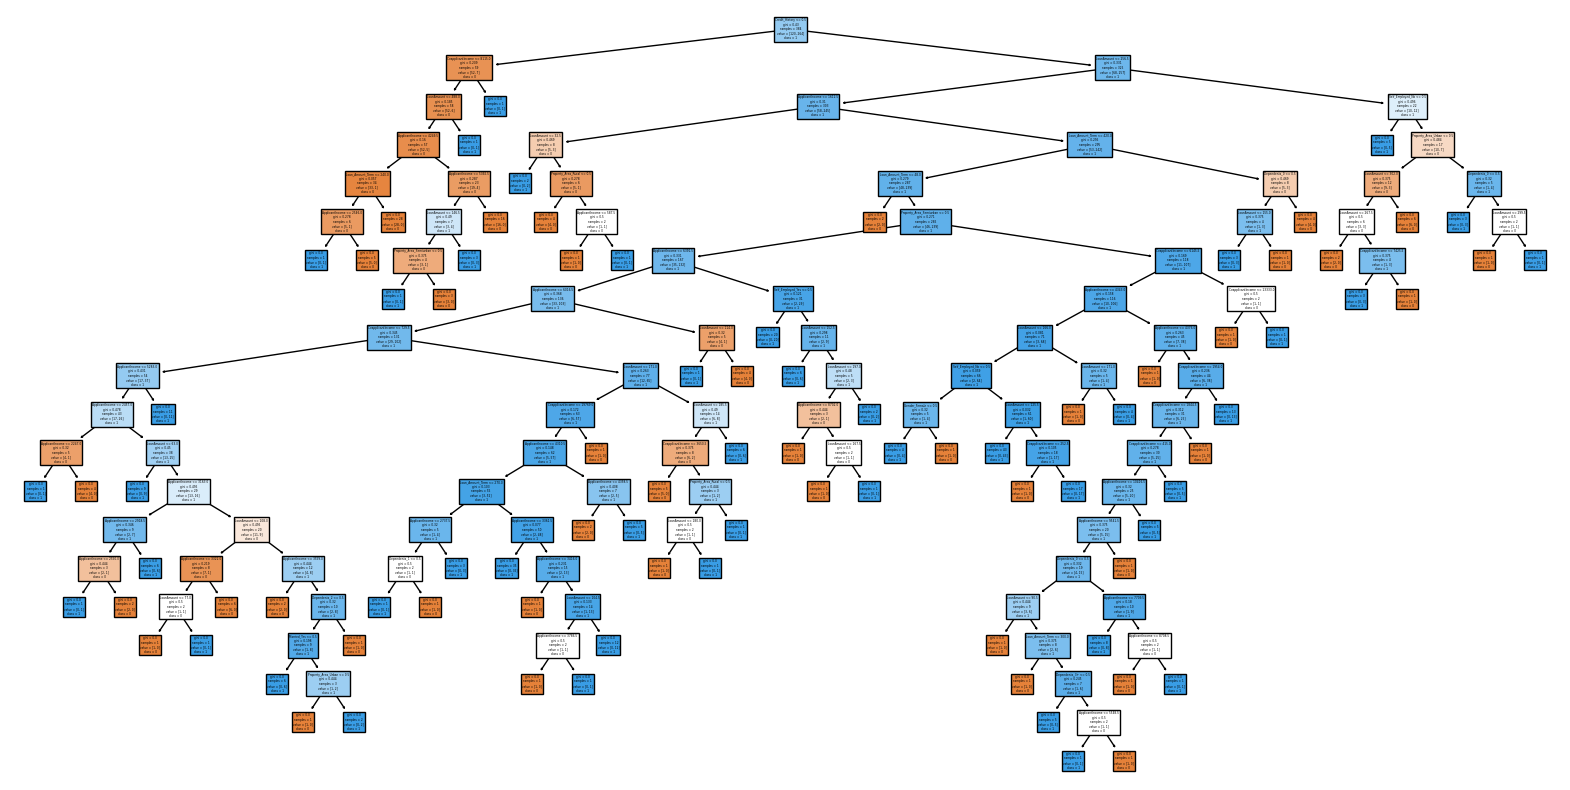

In [104]:
# Decision Tree

plt.figure(figsize=(20,10))
plot_tree(model,feature_names=X.columns.tolist(),class_names=['0','1'],filled=True)
plt.show()